In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = [
    [
        [6, 2, 1],
        [1, 7, 1],
        [2, 1, 8]
    ],
    [
        [7, -1, 2],
        [3, 8, 1],
        [1, -1, 9]
    ],
    [
        [5, 1, 2],
        [1, 6, -1],
        [2, 1, 7]
    ],
    [
        [9, 2, -1],
        [2, 7, 2],
        [3, 1, 6]
    ],
    [
        [8, -2, 1],
        [1, 9, -1],
        [2, 1, 7]
    ]
]
y = [
    [11, 13, 15],
    [16, 18, 14],
    [12, 15, 13],
    [19, 16, 17],
    [14, 13, 15]
]

def diagonal_dominant(x):
    x = np.array(x)
    diag = np.diag(np.abs(x))
    off_diag = np.sum(np.abs(x), axis =1 ) - diag
    result = np.all(diag > off_diag)
    return result

def gauss_seidel(x, y, tol = 0.001, max_iter = 45):
    if not diagonal_dominant(x):
        print("Not Diagonal Dominant")
        return 
    
    x = np.array(x)
    y = np.array(y)

    diag = np.diag(x)
    x = -x
    np.fill_diagonal(x, 0)

    old_res = np.zeros(len(x[0]))
    print("Diagonal Dominant")

    for i in range(max_iter):
        new_res = np.array(old_res)

        for idx, row in enumerate(x):
            new_res[idx] = (y[idx] + np.dot(row, new_res)) / diag[idx]
        
        print(f"Iteration {i+1} : {new_res}")
        distance = np.sqrt(np.dot(old_res - new_res, old_res - new_res))

        if distance < tol:
            print("Converged")
            print(f"Result : {new_res}")
            return

        old_res = new_res

for i in range(0,3):
    print(f"Matrix {i+1} : ")
    gauss_seidel(x[i], y[i])

Matrix 1 : 
Diagonal Dominant
Iteration 1 : [1.83333333 1.5952381  1.2172619 ]
Iteration 2 : [1.09871032 1.52628968 1.40953621]
Iteration 3 : [1.0896474  1.50011663 1.41507357]
Iteration 4 : [1.09744886 1.49821108 1.4133614 ]
Iteration 5 : [1.09836941 1.49832417 1.41311713]
Converged
Result : [1.09836941 1.49832417 1.41311713]
Matrix 2 : 
Diagonal Dominant
Iteration 1 : [2.28571429 1.39285714 1.45634921]
Iteration 2 : [2.0685941  1.29223356 1.46929327]
Iteration 3 : [2.050521   1.29739297 1.47187466]
Iteration 4 : [2.05052052 1.29707047 1.47183888]
Converged
Result : [2.05052052 1.29707047 1.47183888]
Matrix 3 : 
Diagonal Dominant
Iteration 1 : [2.4        2.1        0.87142857]
Iteration 2 : [1.63142857 2.37333333 1.05197279]
Iteration 3 : [1.50454422 2.42457143 1.08090573]
Iteration 4 : [1.48272342 2.43303039 1.08593182]
Iteration 5 : [1.47902119 2.43448511 1.08678179]
Iteration 6 : [1.47839026 2.43473192 1.08692679]
Converged
Result : [1.47839026 2.43473192 1.08692679]


alpha : [[2.2]
 [0.7]]


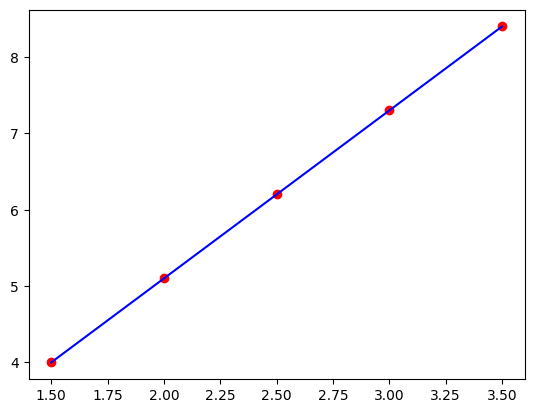

In [5]:
x = [1.5, 2.0, 2.5, 3.0, 3.5]
y = [4.0, 5.1, 6.2, 7.3, 8.4]

x = np.array(x)
y = np.array(y)

A = np.vstack([x, np.ones(len(x))]).T
Y = y[:, np.newaxis]
alpha = np.linalg.inv(np.dot(A.T, A))
alpha = np.dot(alpha, A.T)
alpha = np.dot(alpha, Y)

print(f"alpha : {alpha}")

plt.plot(x, y, "ro")
plt.plot(x, alpha[0]*x+alpha[1], "b-")
plt.show()

In [6]:
def f(x):
    return 3 * (x**5) - x**3 + 2*x - 7

def g(x):
    return 15 * (x**4) - 3 * (x**2) + 2

def newton_raphson(x, tol = 0.003, max_iter = 20):
    found = False
    for i in range(max_iter):
        x = x - (f(x)/g(x))

        print(f"iteration {i+1} : {x}")

        if np.abs(f(x)) < tol:
            print(f"Found root at {i+1} iteration : {x} ")
            found = True
            return
        
    if found == False:
        print("error")
        return
    
newton_raphson(1)

iteration 1 : 1.2142857142857142
iteration 2 : 1.162672109711684
iteration 3 : 1.1576408093453536
Found root at 3 iteration : 1.1576408093453536 


In [7]:
def f(x):
    return 4 * (x**3) - 3* (x**2) + 2*x - 1
    
a = 2
b = 6
n = 10000

width = (b-a) / (n-1)
x = np.linspace(a,b,n)
y = f(x)

left_rieman = width * np.sum(f(x[:-1]))
right_rieman = width * np.sum(f(x[1:]))

print(f"Left : {left_rieman}")
print(f"right : {right_rieman}")

Left : 1099.8511899194723
right : 1100.1488196824484
